<a href="https://colab.research.google.com/github/2003DEE/DEEPAK/blob/main/gradient%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)

In [2]:
def two_deg_jit(coeff,x,j):
  a=coeff[0]*(x*x)
  b=coeff[1]*(x)
  c=coeff[2]
  y=a+b+c
  interval=[y-j,y+j]
  min=interval[0]
  max=interval[1]
  jit=random.random()*max
  while min>jit:
    jit=random.random()*max
  return jit
hun_x=np.random.uniform(-10,10,100)
coeff=[1,1,1]
xl=[];yl=[]
for x in hun_x:
  y=two_deg_jit(coeff,x,0.5)
  xl.append(x)
  yl.append(y)


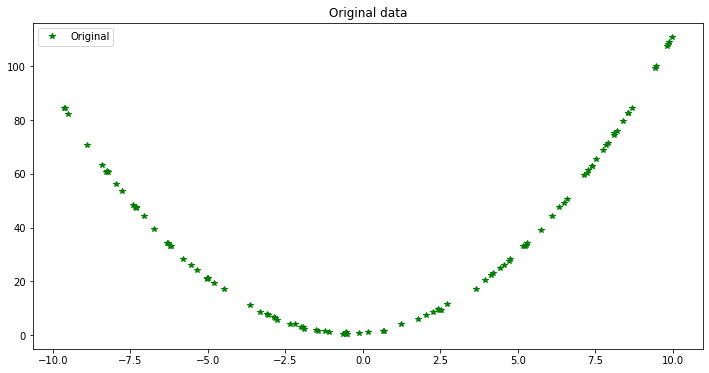

In [3]:
plt.figure(figsize=(12,6))
plt.plot(xl,yl,'g*',label="Original")
plt.title("Original data")
plt.legend()
plt.show()


In [22]:
def two_coef(coeff,x):
  a=coeff[0]*(x*x)
  b=coeff[1]*x
  c=coeff[2]
  y=a+b+c
  return y
xl=[];yl=[];coeff=[1,1,1]
for x in hun_x:
  y=two_coef(coeff,x)
  xl.append(x)
  yl.append(y)

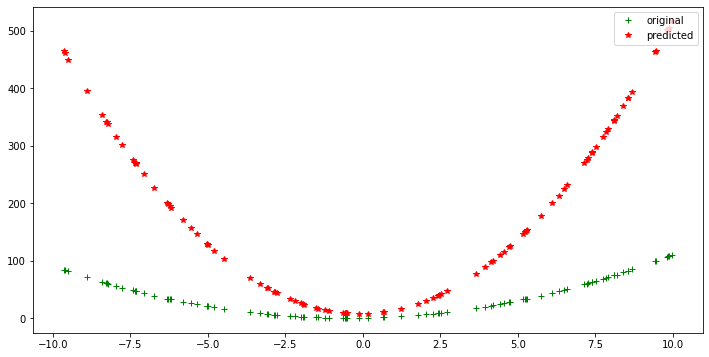

In [23]:
rand_coeff=(random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10))
yl_bar=two_coef(rand_coeff,hun_x)
plt.figure(figsize=(12,6))
plt.plot(xl,yl,'g+',label='original')
plt.plot(xl,yl_bar,'r*',label='predicted')
plt.legend(loc='upper right')
plt.show()

In [24]:
def loss(yl,yl_bar):
  return sum((yl-yl_bar)**2)/len(yl)
ini_mse=loss(yl,yl_bar)
ini_mse

36984.62700526056

In [25]:
def cal(rand_coeff,hun_x,yl):
  a=[]
  b=[]
  c=[]
  yl_bars=two_coef(rand_coeff,hun_x)
  for x,yl,yl_bar in list(zip(hun_x,yl,yl_bars)):
    part_a=(x**2)*(yl-yl_bar)
    a.append(part_a)
    part_b=(x)*(yl-yl_bar)
    b.append(part_b)
    part_c=yl-yl_bar
    c.append(part_c)
    
  num=[i for i in yl_bars]
  n=len(yl_bars)
  grad_a=(-2/n)*sum(a)
  grad_b=(-2/n)*sum(b)
  grad_c=(-2/n)*sum(c)

  return (grad_a,grad_b,grad_c)

In [26]:
cal_grad=cal(rand_coeff,hun_x,yl)
lr=0.0002
new_a=rand_coeff[0]-lr*cal_grad[0]
new_b=rand_coeff[1]-lr*cal_grad[1]
new_c=rand_coeff[2]-lr*cal_grad[2]

new_coeff=(new_a,new_b,new_c)
new_yl_bar=two_coef(new_coeff,hun_x)
new_updated_loss=loss(yl,new_yl_bar)
print(ini_mse,new_updated_loss)

36984.62700526056 609.3377684695183


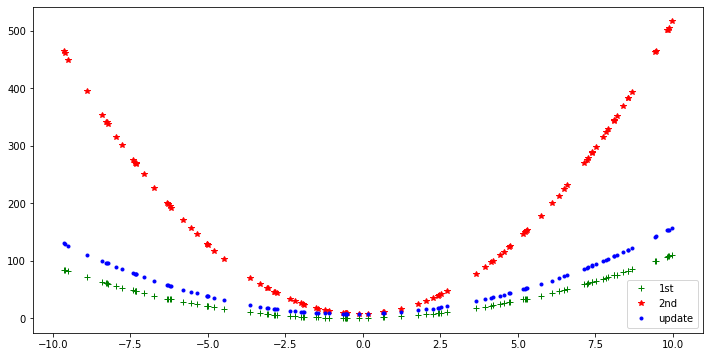

In [29]:
plt.figure(figsize=(12,6))
plt.plot(xl,yl,'g+',label="1st")
plt.plot(xl,yl_bar,'r*',label="2nd")
plt.plot(xl,new_yl_bar,'b.',label="update")
plt.legend()
plt.show()

In [63]:
def cal_gra(coeff,in_x,out_y,lr):
  a=[];b=[];c=[]
  yl_bars=two_coef(coeff,in_x)
  for x,yl,yl_bar in list(zip(in_x,out_y,yl_bars)):
    pa_a=(x**2)*(yl-yl_bar)
    a.append(pa_a)
    pa_b=(x)*(yl-yl_bar)
    b.append(pa_b)
    pa_c=yl-yl_bar
    c.append(pa_c)
  num=[i for i in yl_bars]
  n=len(num)
  grad_a=(-2/n)*sum(a)
  grad_b=(-2/n)*sum(b)
  grad_c=(-2/n)*sum(c)
  
  new_a=coeff[0]-lr*grad_a
  new_b=coeff[1]-lr*grad_b
  new_c=coeff[2]-lr*grad_c

  new_model=(new_a,new_b,new_c)
  new_yl_bar=two_coef(new_model,in_x)
  new_updated_loss=loss(out_y,new_yl_bar)

  return new_updated_loss,new_model,new_yl_bar

In [64]:
def cal_grad(epoch,lr):
  losses=[]
  rand_coeff_test=rand_coeff
  for i in range(epoch):
    loss=cal_gra(rand_coeff_test,hun_x,yl,lr)
    rand_coeff_test=loss[1]
    losses.append(loss[0])
  return loss[0],loss[1],loss[2],losses

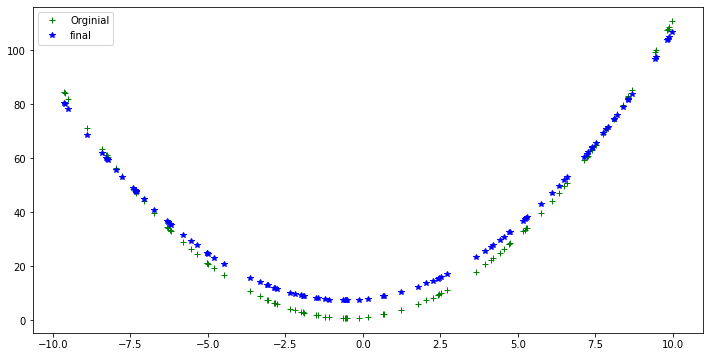

In [67]:
grad=cal_grad(500,0.0001)
plt.figure(figsize=(12,6))
plt.plot(xl,yl,'g+',label="Orginial")
plt.plot(xl,grad[2],'b*',label="final")
plt.legend()
plt.show()

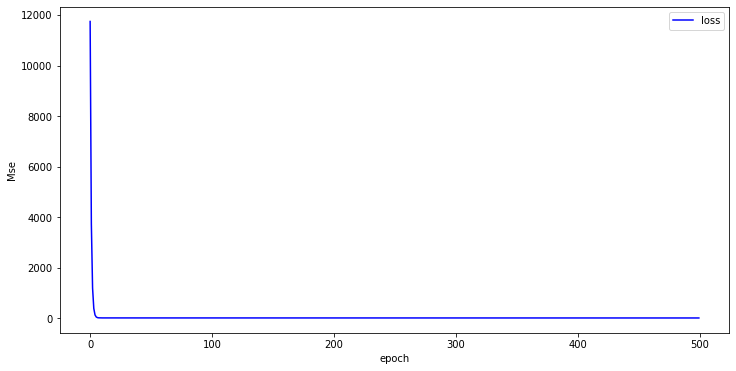

In [71]:
plt.figure(figsize=(12,6))
plt.plot(grad[3],'b-',label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Mse')
plt.show()